## Customer Analysis 

### Using Watson Analytics Dataset

Avaliable from https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

The significance of customer analytics is increasing as businesses now have easier access to customer data and customers themselves can easily obtain information on similar products and services provided by competitors. Consequently, it has become crucial for businesses to comprehend and predict their customers' purchasing and viewing behaviors. The more profound the understanding a company has about its customers, the greater its competitive advantage over rivals.

In [82]:
import matplotlib as plt
import pandas as pd

## 1 Import data

In [83]:
df=pd.read_csv('/Users/xusijia/Desktop/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [84]:
df.shape

(9134, 24)

## 2 EDA

### Customer response analysis
### Response filed standards for customers reponsed to the marketing strategy

In [85]:
df.groupby('Response').count()['Customer'] #total number of response

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

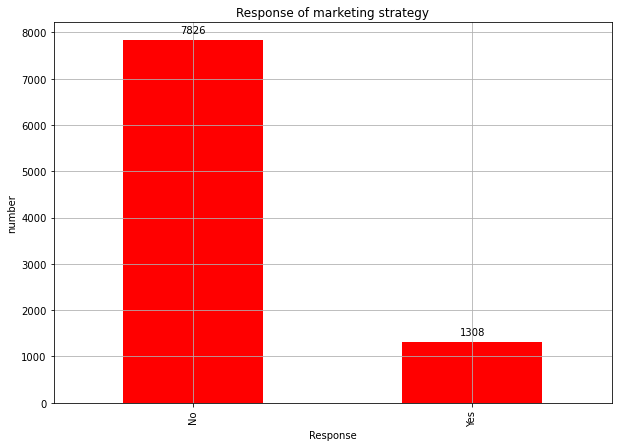

In [86]:
ax=df.groupby('Response').count()['Customer'].plot(
    kind='bar',
    color='r',
    grid=True,
    figsize=(10,7),
    title='Response of marketing strategy')

ax.set_xlabel('Response')
ax.set_ylabel('number')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

#### The "Renew Offer Type" column in this DataFrame represents the various renewal offers presented to customers. We will investigate which offer types were most effective for retaining engaged customers.

In [87]:
offer_by_type_df=df.loc[
    df['Response'] == 'Yes',
].groupby([
    'Renew Offer Type'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

print(offer_by_type_df)

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64


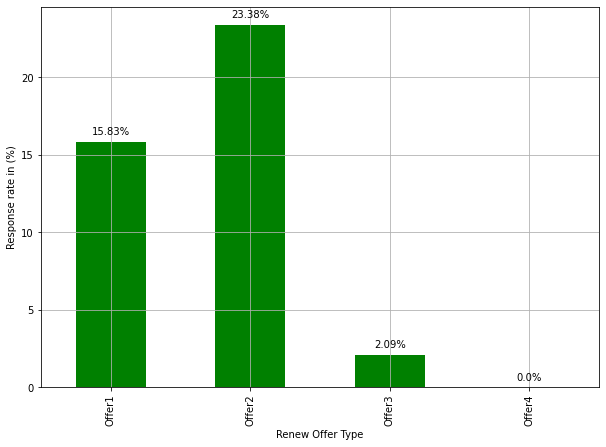

In [88]:
# Viz in bar chart

ax=(offer_by_type_df*100.0).plot(
   kind='bar',
   figsize=(10,7),
   color='g', 
   grid=True)

ax.set_ylabel('Response rate in (%)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

In [89]:
offer_by_type_df=df.loc[
    df['Response'] == 'Yes',
].groupby([
    'Renew Offer Type','Vehicle Class'
]).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

print(offer_by_type_df)

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64


In [90]:
offer_by_type_df = offer_by_type_df.unstack().fillna(0)
offer_by_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


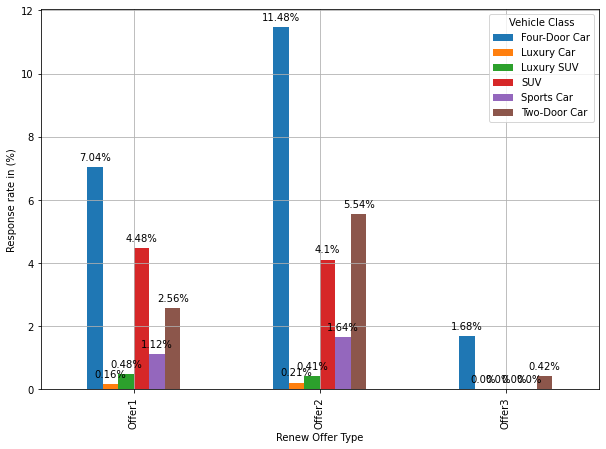

In [91]:
ax=(offer_by_type_df*100.0).plot(
   kind='bar',
   figsize=(10,7), 
   grid=True)

ax.set_ylabel('Response rate in (%)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

In the previous section on "Respond Rates by Offer Type," we found that the Offer had the highest response rate among customers. By analyzing the data further and breaking down the customer attributes by the "Vehicle class" category, we can gain more insights. We observe that customers with Four-Door Car respond more frequently to all offer types, and those with "Luxury SUV™" have a higher chance of responding to Offer than to Offer2. Such differences in response rates among different customer segments can help us fine-tune our target audience for different offers.

### Response Rate by Sales Channel

In [92]:
resp_by_salech_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

print(resp_by_salech_df)

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64


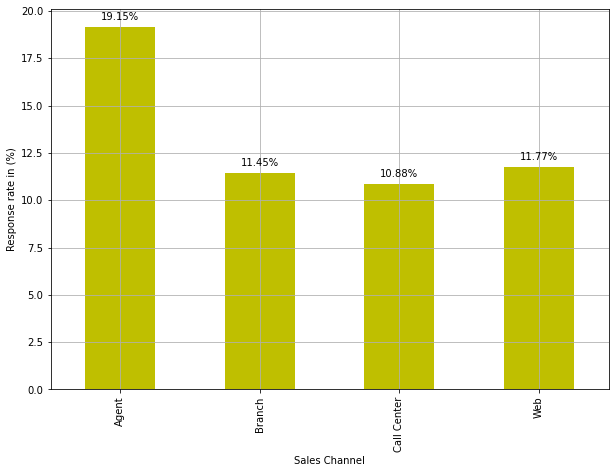

In [93]:
ax=(resp_by_salech_df*100.0).plot(
   kind='bar',
   color='y',
   figsize=(10,7), 
   grid=True)

ax.set_ylabel('Response rate in (%)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

As shown in the plot, Agent works better in terms of getting responses from the customers, web is the second best channel.

### Sales Channel vs. Vehicle Size

In [94]:
salechan_vel_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

print(salechan_vel_df)

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64


In [95]:
salechan_vel_df = salechan_vel_df.unstack().fillna(0)
print(salechan_vel_df)

Vehicle Size      Large   Medsize     Small
Sales Channel                              
Agent          0.020708  0.144953  0.025884
Branch         0.021036  0.074795  0.018699
Call Center    0.013598  0.067989  0.027195
Web            0.013585  0.095094  0.009057


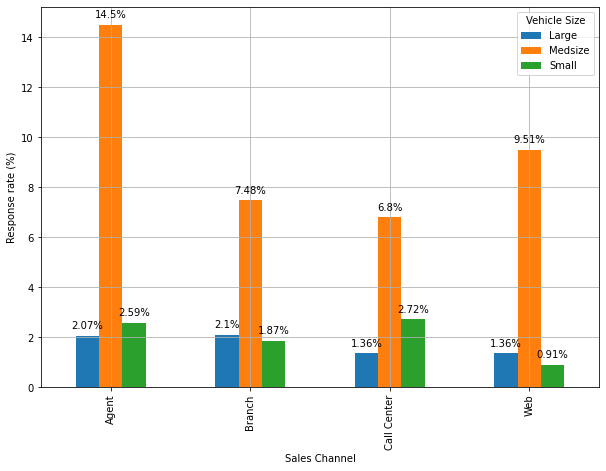

In [96]:
ax = (salechan_vel_df*100).plot(
      kind = 'bar',
      figsize = (10,7),
      grid=True
)

ax.set_ylabel('Response rate (%)')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

As shown in the graph, customers with medium size vehicle reponse the most to all sales Channel.

### Responce rates by months since policy inception

In [97]:
month_icep_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
   by = 'Months Since Policy Inception'
)['Response'].count()/df.groupby(
   by = 'Months Since Policy Inception'
)['Response'].count()*100.0

print(month_icep_df)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97          NaN
98          NaN
99     7.692308
Name: Response, Length: 100, dtype: float64


Text(0, 0.5, 'Response rate (%)')

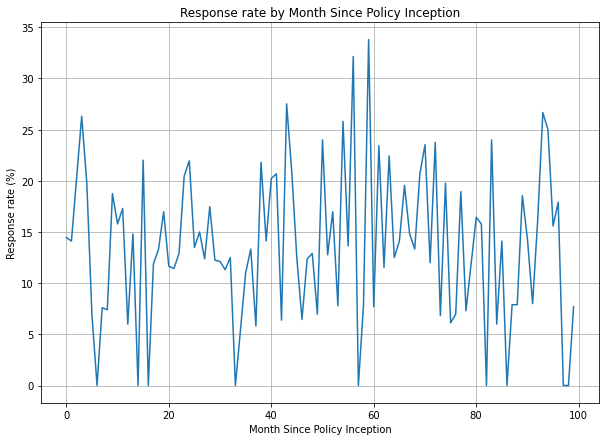

In [98]:
ax = month_icep_df.fillna(0).plot(
      title = 'Response rate by Month Since Policy Inception',
      figsize = (10,7),
      grid=True
)

ax.set_xlabel('Month Since Policy Inception')
ax.set_ylabel('Response rate (%)')


### CLV vs. Month Since Policy Inception 

In [99]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

For the previous output, we are going to define those customers with a CLV higher than the median as High-CLV, those with a CLV lower than the median as Low-CLV.

In [100]:
df['CLV seg'] = df['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low'
)

In [101]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [102]:
df['Policy Age seg'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

In [103]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV seg,Policy Age seg
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


Text(0.5, 1.0, 'Seg By CLV and Policy Age')

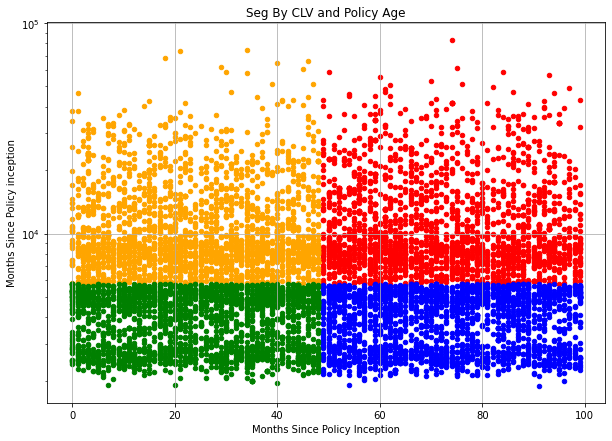

In [104]:
ax = df.loc[
    (df['CLV seg'] == 'High') & (df['Policy Age seg'] == 'High')
].plot.scatter(
     x = 'Months Since Policy Inception',
     y = 'Customer Lifetime Value',
     logy = True,
     color = 'r'
)

ax = df.loc[
    (df['CLV seg'] == 'Low') & (df['Policy Age seg'] == 'High')
].plot.scatter(
     ax = ax,
     x = 'Months Since Policy Inception',
     y = 'Customer Lifetime Value',
     logy = True,
     color = 'blue'
)

ax = df.loc[
    (df['CLV seg'] == 'High') & (df['Policy Age seg'] == 'Low')
].plot.scatter(
     ax = ax,
     x = 'Months Since Policy Inception',
     y = 'Customer Lifetime Value',
     logy = True,
     color = 'orange'
)

ax = df.loc[
    (df['CLV seg'] == 'Low') & (df['Policy Age seg'] == 'Low')
].plot.scatter(
     ax = ax,
     x = 'Months Since Policy Inception',
     y = 'Customer Lifetime Value',
     logy = True,
     color = 'green',
     grid = True,
     figsize = (10,7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_ylabel('Months Since Policy inception')
ax.set_title('Seg By CLV and Policy Age')

In [105]:
respn_rate_by_seg_df = df.loc[
    df['Response'] == 'Yes'
].groupby([
    'CLV seg', 'Policy Age seg'
]).count()['Customer']/df.groupby([
    'CLV seg', 'Policy Age seg'
]).count()['Customer']

print(respn_rate_by_seg_df)

CLV seg  Policy Age seg
High     High              0.138728
         Low               0.132067
Low      High              0.162450
         Low               0.139957
Name: Customer, dtype: float64


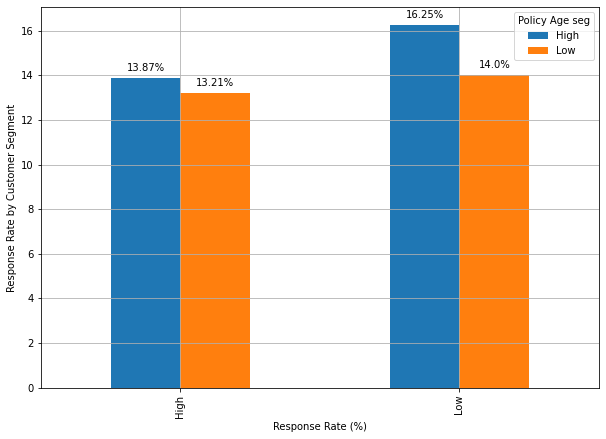

In [106]:
ax = (respn_rate_by_seg_df.unstack()*100.0).plot(
     kind = 'bar',
     figsize = (10,7),
     grid = True
)

ax.set_xlabel('Response Rate (%)')
ax.set_ylabel('Response Rate by Customer Segment')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

It is evident that customers with higher policy age have a higher engagement rate than those with lower policy age. This observation suggests that customers who have been insured by the company for a longer duration are more likely to respond. Additionally, the segment with high policy age and low CLV has the highest engagement rate among the four segments.

Segmenting customers based on their attributes can provide valuable insights into the behavior of different customer groups. This information can be used to tailor marketing messages and improve customer targeting, ultimately leading to more effective marketing campaigns.